In [346]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
files = glob('ca/distribution_more_1_ca/vehs_*')
df = pd.read_csv('ca/distribution_more_1_ca/vehs_106')
df_th = df[(df['entrance_intersection'] == 1) & (df['exit_intersection'] == 5)]
#df_th = df[(df['entrance_intersection'] == 1)]
df_th2 = df_th[(df_th['entrance_time'] > 200)]
df_th2['timetaken15'] = df_th2['exit_time'] - df_th2['entrance_time']
df_th2

C:\Users\Chestnut\Anaconda3\envs\algorithmEnv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,id,lane,entrance_time,exit_time,entrance_intersection,entrance_direction,exit_intersection,exit_direction,timetaken15
26,28,0,206.0,327.0,1,S,5,N,121.0
27,26,1,203.0,327.0,1,S,5,N,124.0
28,27,1,205.0,329.0,1,S,5,N,124.0
29,31,0,208.0,329.0,1,S,5,N,121.0
30,32,0,210.0,331.0,1,S,5,N,121.0
31,29,0,206.0,333.0,1,S,5,N,127.0
32,30,1,207.0,339.0,1,S,5,N,132.0
33,34,1,247.0,342.0,1,S,5,N,95.0
34,33,0,246.0,343.0,1,S,5,N,97.0
35,37,1,251.0,422.0,1,S,5,N,171.0


In [347]:
df_th2['timetaken15'].describe()

count    143.000000
mean     150.440559
std       31.770884
min       95.000000
25%      120.500000
50%      163.000000
75%      172.000000
max      266.000000
Name: timetaken15, dtype: float64

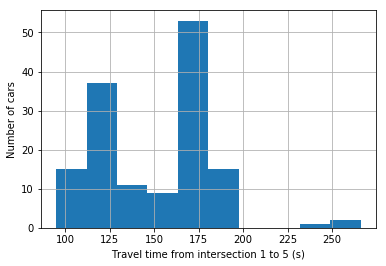

In [348]:
ax = df_th2['timetaken15'].hist(bins=10)
ax.set_xlabel('Travel time from intersection 1 to 5 (s)')
ax.set_ylabel('Number of cars')
plt.savefig('vehs106_ca_more1_hist.png', dpi=600, transparent=True)
# hist, edges = np.histogram(df_th2['timetaken15'], density=False)
# plt.hist(hist) 
# plt.show()

In [349]:
outputs = []
for i,file in enumerate(files): 
    df = pd.read_csv(file)
    df_th = df[(df['entrance_intersection'] == 1) & (df['exit_intersection'] == 5)]
    df_th = df_th[df_th['entrance_time'] > df_th['exit_time'].min()]
    df_th['timetaken15'] = df_th['exit_time'].values - df_th['entrance_time'].values
    out = df_th['timetaken15'].describe()
    out.name = i
    outputs.append(out)
out_df = pd.concat(outputs, axis=1).T
mean_val = out_df['mean'].mean()

In [350]:
mean_val

150.72572016064055

## Loop through 100 "veh_" files and calculated time taken bewteen Intersection 1 and Intersection 5
------

In [339]:
outputs = []
for (i,file) in enumerate(files): 
    df = pd.read_csv(file)
    df_th = df[(df['entrance_intersection'] == 1) & (df['exit_intersection'] == 5)]
    df_th = df_th[df_th['entrance_time'] > df_th['exit_time'].min()]
    df_th['time_taken_15'] = df_th['exit_time'].values - df_th['entrance_time'].values
    df_th['case_num'] = np.zeros(df_th['time_taken_15'].count()) + i
    outputs.append(df_th)
all_vehs_df = pd.concat(outputs)
all_vehs_df.reset_index(inplace=True)


In [340]:
all_vehs_df.head()

,index,id,lane,entrance_time,exit_time,entrance_intersection,entrance_direction,exit_intersection,exit_direction,time_taken_15,case_num
0,22,23,0,127.0,236.0,1,S,5,N,109.0,0.0
1,24,25,1,132.0,248.0,1,S,5,N,116.0,0.0
2,25,24,0,130.0,249.0,1,S,5,N,119.0,0.0
3,26,29,1,139.0,250.0,1,S,5,N,111.0,0.0
4,27,30,0,140.0,251.0,1,S,5,N,111.0,0.0


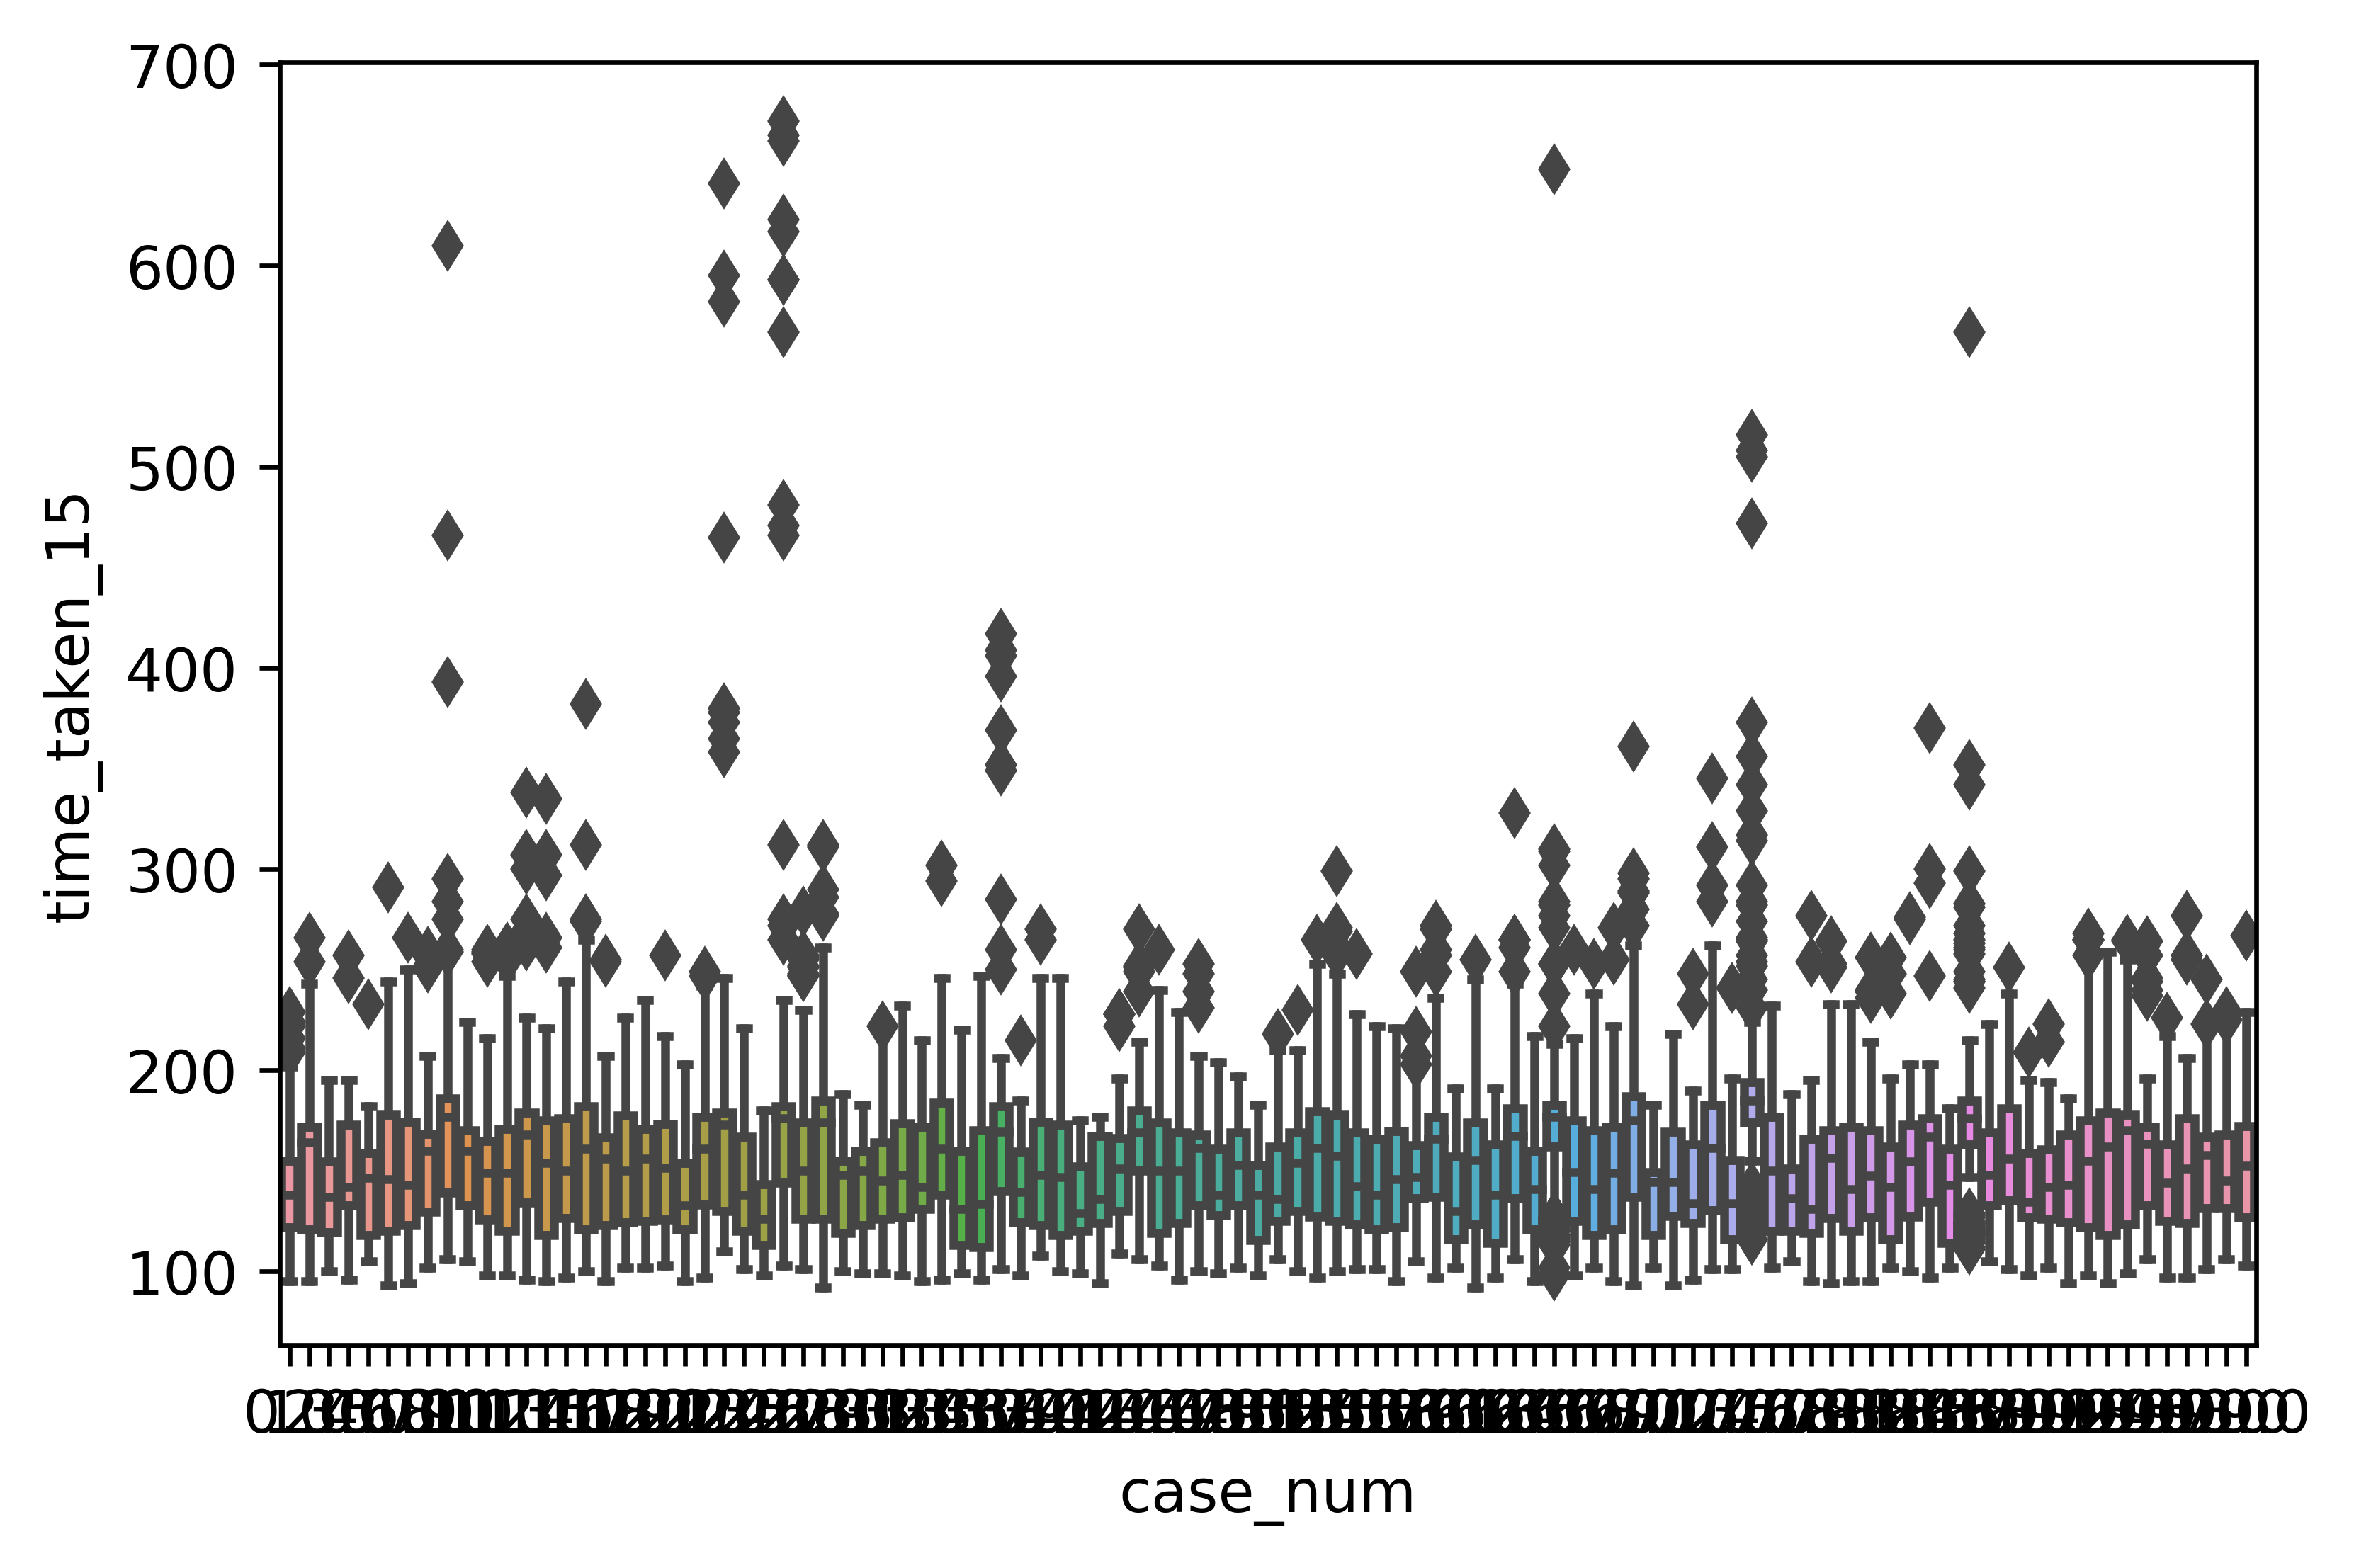

In [331]:
import seaborn as sns 
fig, ax = plt.subplots(dpi=600)
sns.boxplot(ax=ax, x = "case_num", y="time_taken_15", data=all_vehs_df)
plt.savefig("boxplot_ca_more1.png", dpi=1200, transparent=True)

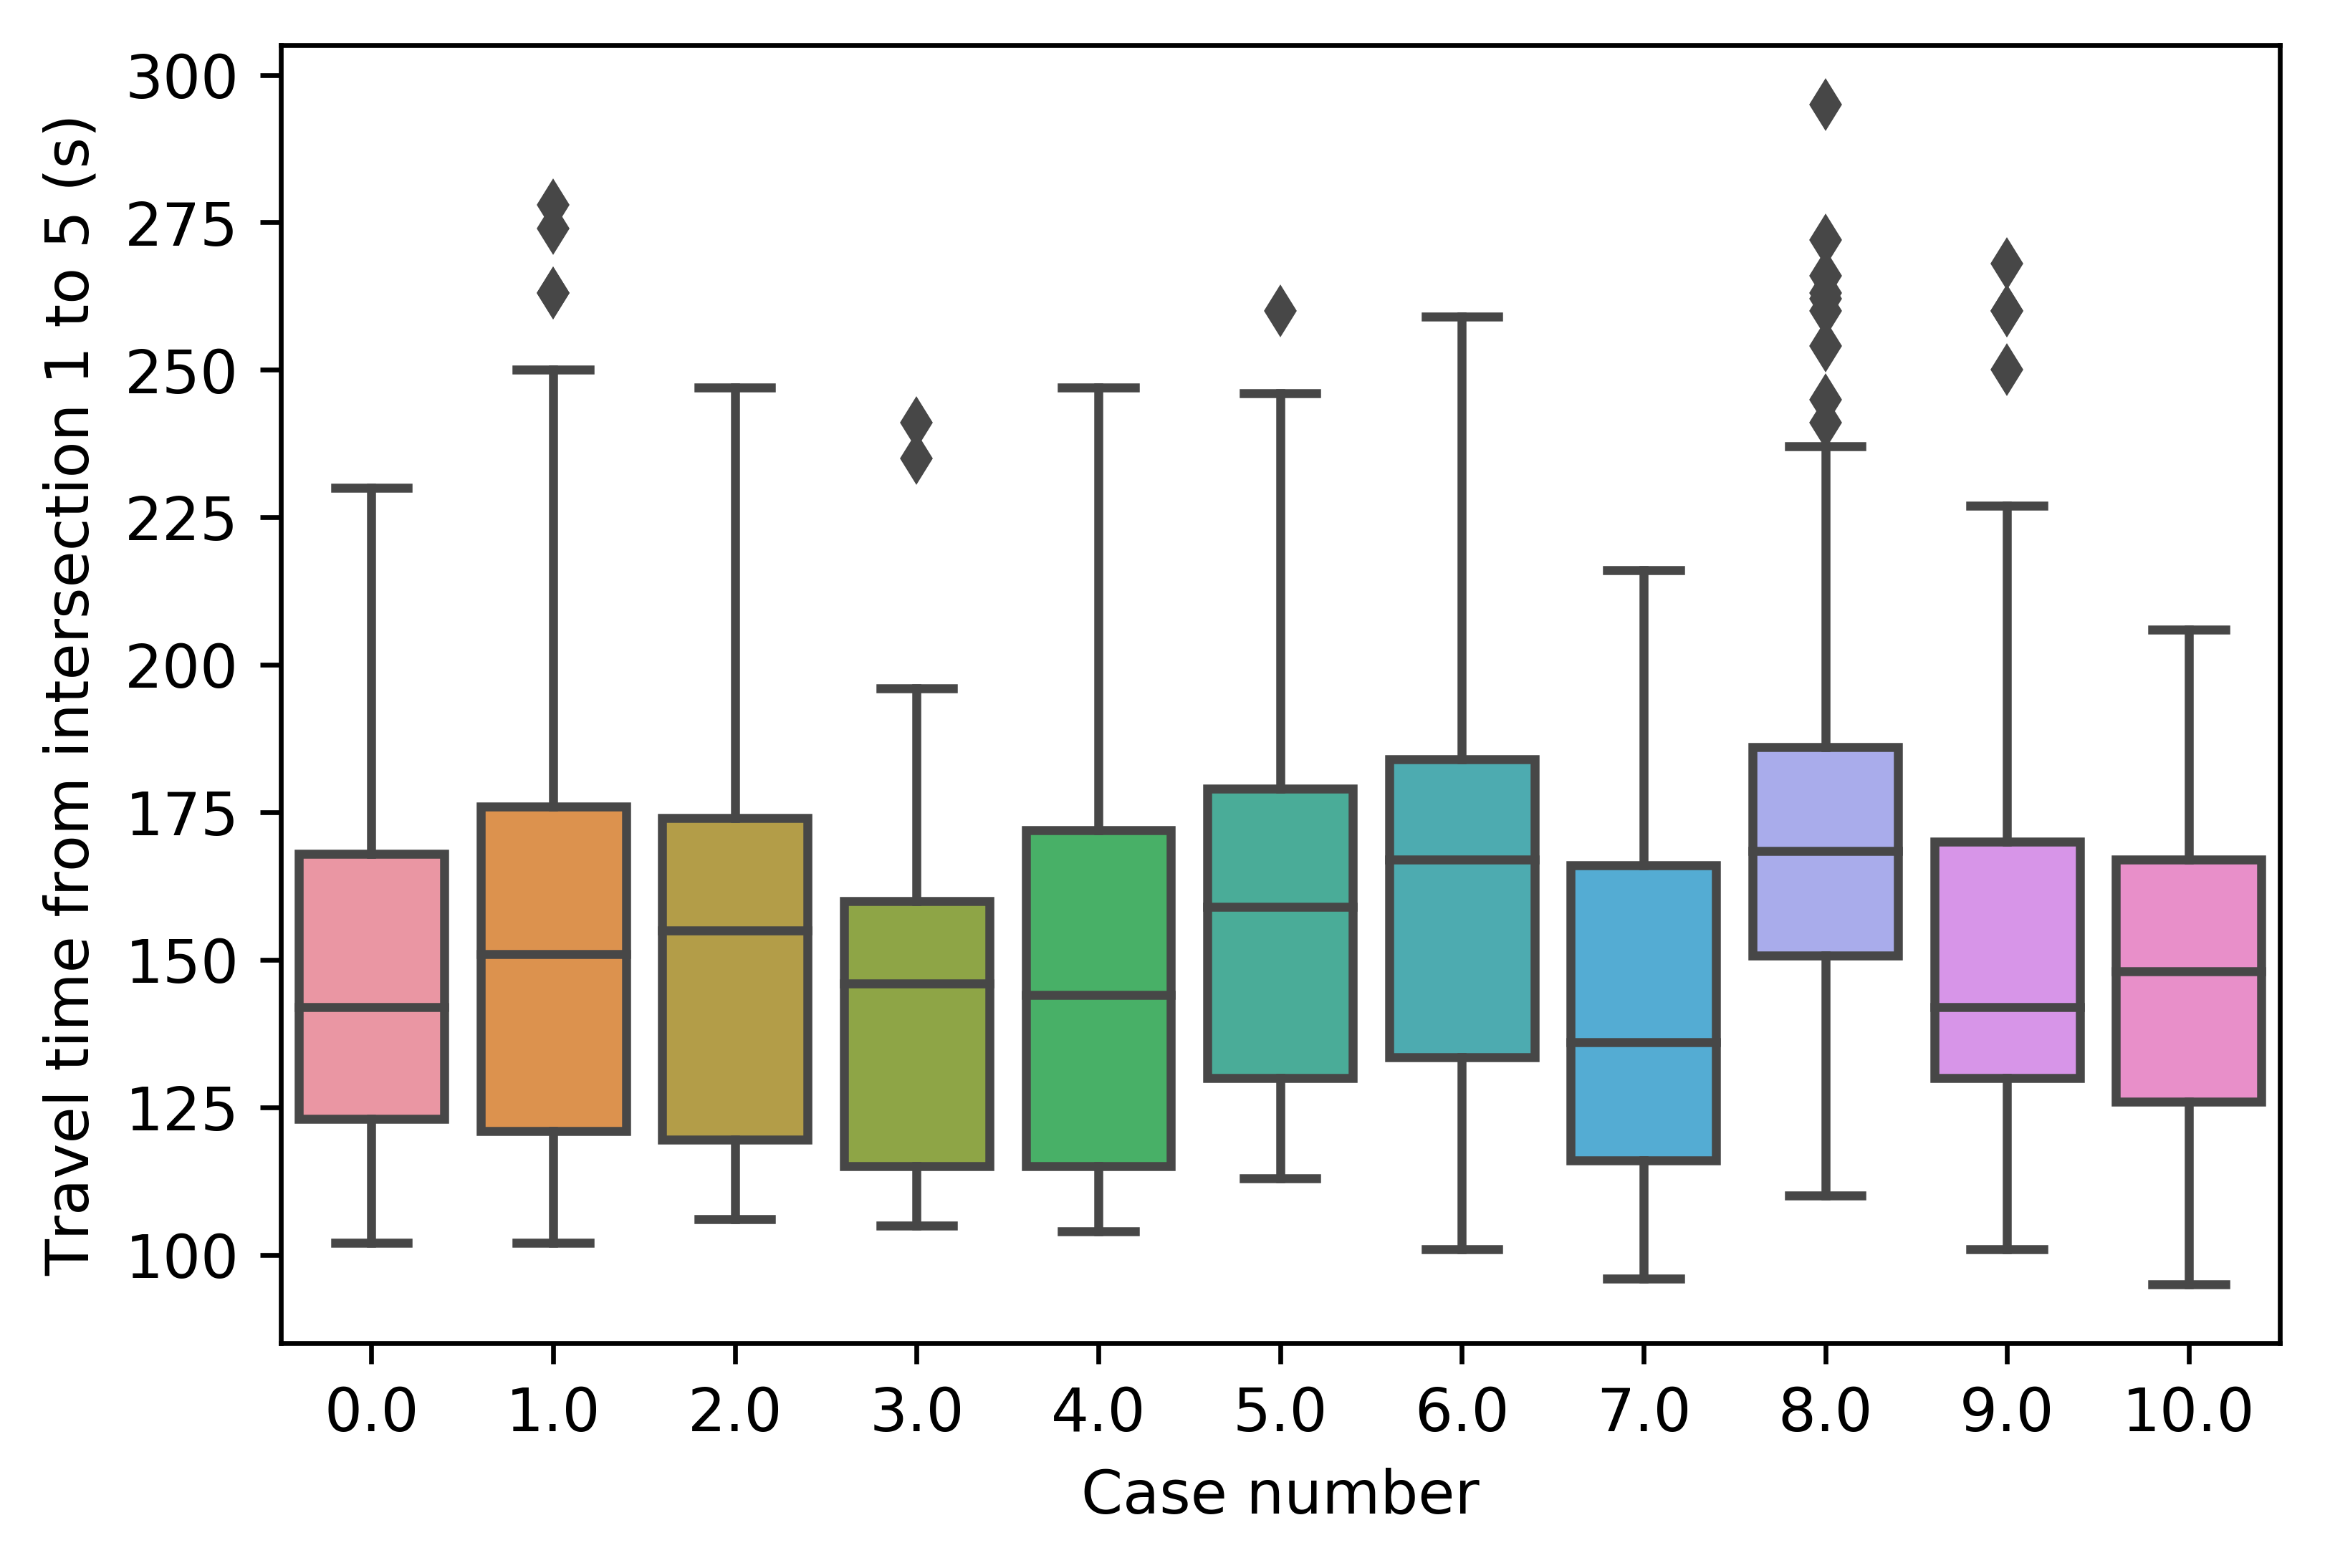

In [351]:
# smaller_df = all_vehs_df.groupby('case_num').apply(lambda df: df.iloc[0::10])
smaller_df = all_vehs_df[all_vehs_df['case_num'] <= 10]
fig, ax = plt.subplots(dpi=600)
sns.boxplot(ax=ax, x = "case_num", y="time_taken_15", data=smaller_df)
ax.set_ylabel("Travel time from intersection 1 to 5 (s)")
ax.set_xlabel("Case number")
plt.savefig("boxplot_event_more1_11cases.png", dpi=2600, transparent=True)

In [283]:
df_th2['timetaken15'].describe()

count     246.000000
mean      570.702927
std       252.161839
min       169.540000
25%       354.605000
50%       495.170000
75%       810.165000
max      1162.150000
Name: timetaken15, dtype: float64